In [1]:
from vaeArgs import getParser
parser = getParser()   
args = parser.parse_args('tfrecords tfrecords-cross-val -H200 -t10000'.split())

import tensorflow as tf
import numpy as np
from vae import create_vae
import time
import json
import os
from vaeArgs import param_string
from data_utils import get_train_dataset, get_validation_dataset

#sess = tf.Session(config=tf.ConfigProto(log_device_placement=args.log_device))

epochs = np.floor(args.n_batches / args.batches_per_epoch).astype(int)
params = param_string(args)
assert epochs > 0
assert args.hidden_dim > args.hidden2_dim
print("Running with params", params)

('Running with params', 'L0.0001-H200-G0-b256-l200-N5096-E32-v202498-t10000')


In [1]:
import keras

/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
vae = create_vae((args.trim_vocab if args.trim_vocab else args.vocab_size),
                 args.hidden_dim, args.latent_dim,
                 intermediate_dim2=args.hidden2_dim,
                 learning_rate=args.learning_rate, epsilon_std=1.0)

In [ ]:
from tensorflow.contrib import tpu
tf.keras.backend.clear_session()

tpu_name = "node-3"
tpu_grpc_url = tf.contrib.cluster_resolver.TPUClusterResolver(tpu=[tpu_name])

with tf.Graph().as_default():
    # Compile model
    print('compiling model')
    vae = create_vae((args.trim_vocab if args.trim_vocab else args.vocab_size),
                     args.hidden_dim, args.latent_dim,
                     intermediate_dim2=args.hidden2_dim,
                     learning_rate=args.learning_rate, epsilon_std=1.0)

    tpu_model = tf.contrib.tpu.keras_to_tpu_model(
            vae,
            strategy=tf.contrib.tpu.TPUDistributionStrategy(tpu_grpc_url)
        )
        
    with tf.Session(tpu_grpc_url.get_master()) as sess:
        # Initialize Variables
        print("initializing system")
        sess.run(tpu.initialize_system())
        print('initializing variables')
        init = tf.global_variables_initializer()
        sess.run(init)



        
        #output = sess.run(tpu_computation)
        #print(output)
        sess.run(tpu.shutdown_system())

        print('Done!')


In [7]:
vae = keras.models.load_model('models/L0.0001-H400-G0-b256-l200-N100-E10-v202498-t10000-keras-full.h5',
                        custom_objects={'calc_vae_loss': calc_vae_loss},
                        compile=False)

In [29]:
from vae import create_vae
from vaeArgs import getParser
parser = getParser()
args = parser.parse_args(('tfrecords tfrecords-cross-val -L0.0001 -H3500 -G1500 -b256 -l500 -N3840 -E128 -v202498 -t10000').split())
vae = create_vae((args.trim_vocab if args.trim_vocab else args.vocab_size),
                         args.hidden_dim, args.latent_dim,
                         intermediate_dim2=args.hidden2_dim,
                         learning_rate=args.learning_rate, epsilon_std=1.0)
vae.load_weights('models/L0.0001000-H1000-G0-b256-l200-N1000-E128-v202498-t10000-keras-full.h5')

In [ ]:
4187 after 20

In [24]:
sess.close()

In [5]:
import tensorflow as tf
options = tf.python_io.TFRecordOptions(tf.python_io.TFRecordCompressionType.GZIP)

def count_docs(filenames):
    N = 0

    for fn in filenames:
        try:
            for record in tf.python_io.tf_record_iterator(fn, options):
                N += 1
        except:
            print(fn)

    return N

import glob
count_docs(glob.glob('data/train/batch_002011*gz'))

317022

In [9]:
sess.close()

In [3]:
from data_utils import *

trim_head = 200
trim_dim = args.dims[0] if (args.dims[0] < args.vocab_size) else None

if not trim_dim:
    args.dims[0] = args.vocab_size - trim_head
    
# Prepare reference to input data
if args.input_gzip:
    compression = "GZIP"
else:
    compression = ""

train_dataset = get_train_dataset(path=args.training_path + "/*.tfrecord",
                                  batch_size=args.batch_size, n_batches=args.n_batches,
                                  trim_dim=trim_dim, trim_head=trim_head,
                                  idf_path=args.idf_path, compression=compression, max_path=args.max_path)

In [1]:
sess.close()

NameError: name 'sess' is not defined

In [4]:
%%time
#sess.close()
# Test small vocab
from KerasAutoencoderRunner import main
from vaeArgs import *
import tensorflow as tf
import keras
tbCallBack = keras.callbacks.TensorBoard(log_dir='./summaries/', histogram_freq=0, write_graph=True, write_images=True)

sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True,
                                                   allow_soft_placement=True))
parser = getParser()
args = parser.parse_args('data/train data/val -L0.00001 -b1024 -N27000 -E100 '
                         '-D 10000 2000 200 2 '
                         '-oAdam --idf_path idf-1.npy -z'.split())
vae, train_dataset, val_dataset, log = main(args, callbacks=[tbCallBack])

/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Running with params L0.0000100-D10000_2000_200_2-b1024-N27000-E100-v202498-oAdam-SCrossEntropy-idf
Train on 1024 samples, validate on 1024 samples
Epoch 1/270
100/100 [==============================] - 29s 293ms/step - loss: 37159715559418288.0000 - val_loss: 6428.7578
Epoch 2/270
100/100 [==============================] - 27s 270ms/step - loss: 341171.9308 - val_loss: 4135.6504
Epoch 3/270
100/100 [==============================] - 27s 269ms/step - loss: 3586.1526 - val_loss: 3443.3184
Epoch 4/270
100/100 [==============================] - 26s 264ms/step - loss: 3168.3638 - val_loss: 3399.3323
Epoch 5/270
100/100 [==============================] - 26s 263ms/step - loss: 2970.1326 - val_loss: 3383.4937
Epoch 6/270
100/100 [==============================] - 26s 264ms/step - loss: 2974.2154 - val_loss: 3347.2048
Epoch 7/270
100/100 [==============================] - 27s 268ms/step - loss: 2927.5375 - val_loss: 3303.5911
Epoch 8/270
100/100 [==============================] - 27s 272ms/ste

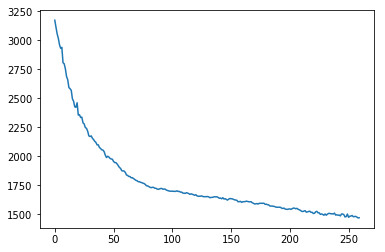

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(log['history']['val_loss'][10:])

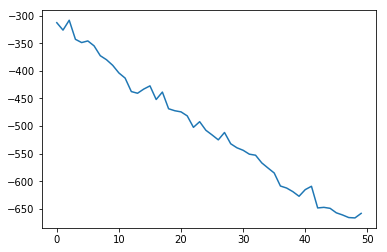

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(log['history']['val_loss'][150:])

- 1GPU, 50 batches of 512, eval dense before, trimming to 20-600 pages, no tfidf
  - Timing: 3min 31s
  - loss: 593.0735 - val_loss: 764.8629
  
- 2GPU, 50 batches of 512, eval dense before, trimming to 20-600 pages, no tfidf
  - Timing: 3min 24s
  - loss: 511.3504 - val_loss: 808.3628
  
- 2GPU, 50 steps per epoch with 25 val_steps, batches of 512, passing tensor as data, not trimming, no tfidf
  - Timing: 1min 32s
  - loss: 7714.0722 - val_loss: 793.6397

In [9]:
encoder = vae.layers[1]
i = token_ref[token_ref.token.isin(['california', 'texas', 'colorado', 'washington', 'state'])].index
print(i)
a = np.zeros((1,10000), 'int')
a[0,i] = 1
b = encoder.predict(a)[2]
sims = cdist(b, latent)
most_similar_ids = pd.Series(sims[0,:10]).sort_values().index
most_similar = [token_ref.iloc[id].token for id in most_similar_ids[1:1+50]]
print(most_similar[:20])

NameError: name 'token_ref' is not defined

In [10]:
c = decoder.predict(b)
d = pd.Series(c[0]).sort_values(ascending=False)
e = d.index
token_ref.iloc[e].head()

NameError: name 'decoder' is not defined

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, cdist
trim_head = 200
token_ref = pd.read_csv('eng-vocab-1.txt.bz2', names=['token'])[trim_head:].reset_index(drop=True)
weights1 = vae.weights[0].eval()
weights2 = vae.weights[-2].eval().T
idf = np.load('idf-1.npy')[trim_head:]

In [60]:
# Create an array with a doc for each term, consisting of only that term
arrs = []
vsize = 15000
for i in range(10):
    ones = np.zeros((1000, vsize))
    for j in range(1000):
        #np.fill_diagonal(ones, np.load("idf-1.npy"))
        ones[j, i*1000+j] = idf[i*1000+j]
    encoder = vae.layers[1]
    latent = encoder.predict(ones)[0]
    arrs.append(latent)
    if i % 5 == 0:
        print(i)
latent = np.vstack(arrs)
del arrs

def get_similar_words(word, n=10, trim=200000, latent=latent):
    word_i = token_ref[token_ref.token == word].index[0]
    wordvec = latent[word_i, :]
    sims = cdist([wordvec], latent, metric='cosine')
    most_similar_ids = pd.Series(sims[0,:trim]).sort_values().index
    most_similar = [token_ref.iloc[id].token for id in most_similar_ids[1:1+n]]
    return most_similar

0
5


In [17]:
def get_word_vec(word)
    word_i = token_ref[token_ref.token == word].index[0]
    vec = np.zeros((1, vsize))
    vec[word_i] = 

(359, 6442, 2536)

In [254]:
a = np.array([distance.cosine(encoder.predict(vec1)[2][0], encoder.predict(vec2)[2][0]) for a in range(10)])
b = np.array([distance.cosine(encoder.predict(vec1)[2][0], encoder.predict(vec3)[2][0]) for a in range(10)])
a.mean(), b.mean()

(0.9792690457569801, 1.0095934147845405)

In [14]:
vae1.load_weights('models/L0.0000100-H2100-G1000-b512-l200-N24000-E100-v202498-t100000-oAdam-SCross-entropy-idf-keras-full.h5')

In [ ]:
## Plot

In [12]:
latent_n = 2
decoder = vae.layers[2]
import scipy.stats
# See what the dimensions are about
ones = np.zeros((latent_n,latent_n))
np.fill_diagonal(ones, np.ones(latent_n))
reconstructed = decoder.predict(ones)
ztopics = scipy.stats.zscore(reconstructed, axis=0)

vocab_lim = 10000 # Only inspect words at index vocab_lim and above

for i in range(0,latent_n):
    ind = pd.Series(ztopics[i]).sort_values().index
    ind = ind[ind < vocab_lim]
    print("%d-: %s" % (i, ", ".join(token_ref.iloc[ind[-10:]][::-1]['token'].tolist())))
    print("%d+: %s" % (i, ", ".join(token_ref.iloc[ind[:10]]['token'].tolist())))

0-: deputy, favored, scope, prompt, presbyterian, twelve, hugh, sustained, existence, thereby
0+: solomon, imperfect, instructions, edwin, tout, relief, provinces, discoveries, prizes, europe
1-: '", businesses, legislation, agency, imperial, volunteer, tom, towers, treasury, remained
1+: lost, oriental, ltd, hearings, perception, resist, negro, prime, makes, neighbourhood


In [7]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000)
    print(word + ":\t", ", ".join(results))

L0.0000100-D10000_2000_200_2-b1024-N27000-E100-v202498-oAdam-SCrossEntropy-idf [1476.5294189453125, 1468.61279296875, 1470.1148681640625] idf


NameError: name 'get_similar_words' is not defined

In [14]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000)
    print(word + ":\t", ", ".join(results))

L0.0000100-D15000_5000_1000_200-b1024-N50000-E250-v202498-oAdam-SCrossEntropy-idf [-665.8364868164062, -666.4826049804688, -658.251220703125] idf
love:	 yr, members, curriculum, bell, ocean, cultures, counting, trustees, turning, grows
canada:	 nature, lawyer, truck, poetry, madam, 0.00, alarm, unusually, respectfully, irving
president:	 guess, withdrawn, simultaneously, shipments, tenth, johnson, carpenter, nutrition, pitt, maxwell
beach:	 rails, arrive, maintains, spherical, knights, calling, ring, col, punishment, 467


In [8]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000)
    print(word + ":\t", ", ".join(results))

L0.0000100-H1500-G1000-b1024-l200-N10000-E100-v202498-t10000-oAdam-SCross-entropy-idf [1265.174072265625, 1264.38037109375, 1237.466064453125] idf
love:	 become, forbes, creditor, pathological, sealed, enjoyment, israel, ceremonies, vibration, leather
canada:	 photo, friendly, prey, mass., recent, literally, name, school, lebanon, patient
president:	 fold, news, promoted, philosophers, suspended, locations, countenance, stressed, patronage, steady
beach:	 burst, 307, argues, ores, forthwith, conductors, utility, nerve, residue, hose


In [15]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000, n=15, latent=weights2)
    print(word + ":\t", ", ".join(results))

L0.0000100-D15000_5000_1000_200-b1024-N50000-E250-v202498-oAdam-SCrossEntropy-idf [-665.8364868164062, -666.4826049804688, -658.251220703125] idf
love:	 loved, soul, heart, loves, god, lover, thy, loving, heaven, thine, thee, thou, sweet, passion, song
canada:	 canadian, quebec, ontario, toronto, montreal, ottawa, scotia, vancouver, dominion, province, ont, nova, provincial, australia, halifax
president:	 secretary, chairman, executive, vice-president, committee, elected, vice, members, treasurer, appointed, director, meeting, assistant, senate, congress
beach:	 bay, shore, island, san, angeles, sea, sand, ocean, miami, coastal, harbor, los, tide, waves, diego


In [16]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000, n=15, latent=weights1)
    print(word + ":\t", ", ".join(results))

L0.0000100-D15000_5000_1000_200-b1024-N50000-E250-v202498-oAdam-SCrossEntropy-idf [-665.8364868164062, -666.4826049804688, -658.251220703125] idf
love:	 god, soul, loved, thee, heaven, thy, lover, mother, happiness, hearts, passion, divine, loves, dear, father
canada:	 canadian, ontario, quebec, ottawa, montreal, nova, toronto, scotia, provincial, america, zealand, ont, britain, dominion, england
president:	 secretary, chairman, executive, vice-president, members, elected, appointed, committees, treasurer, vice, member, director, congress, meeting, committee
beach:	 ocean, island, shore, harbor, bay, sea, wave, depth, waters, shores, angeles, plastic, coast, voyage, ridge


In [13]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000, n=15, latent=weights2)
    print(word + ":\t", ", ".join(results))

L0.0000100-H1500-G1000-b1024-l200-N10000-E100-v202498-t10000-oAdam-SCross-entropy-idf [1265.174072265625, 1264.38037109375, 1237.466064453125] idf
love:	 god, thou, thy, thee, soul, jesus, lord, 'd, heaven, hast, father, hath, n't, christ, know
canada:	 fax, american, assn, mgr, journal, market, resources, sales, international, president, billion, dir, industry, council, mining
president:	 committee, members, secretary, council, board, chairman, vote, delegate, convention, delegates, school, department, director, association, executive
beach:	 ave, cumberland, box, villa, bridge, manor, guest, blvd, ein, gasoline, minn, po, detroit, home, contact


In [6]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000)
    print(word + ":\t", ", ".join(results))

L0.0000100-H1500-G0-b256-l512-N10000-E100-v202498-t10000-oAdam-SCross-entropy-idf [1531.830322265625, 1534.1256103515625, 1509.1663818359375] idf
love:	 video, mar, cos, configuration, derivatives, marshal, technology, cylinders, fit, wage
canada:	 moves, conspicuous, scholar, full, cheese, creative, analyze, interrupted, arteries, instructor
president:	 everybody, imperial, ans, established, cure, pet, asian, ratio, respective, hat
beach:	 live, full, regular, gathering, user, psychiatric, designation, postage, sam, rubber


In [7]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000, latent=weights)
    print(word + ":\t", ", ".join(results))

L0.0000100-H1500-G0-b256-l512-N10000-E100-v202498-t10000-oAdam-SCross-entropy-idf [1531.830322265625, 1534.1256103515625, 1509.1663818359375] idf
love:	 mother, blessed, heaven, pray, holy, christ, sorrow, heavenly, soul, loves
canada:	 jersey, brussels, seven, japan, northwest, canadian, carry, period, communications, rico
president:	 executive, secretary, chairman, treasurer, affairs, director, association, trustee, meeting, council
beach:	 periodical, ocean, cedar, barn, yorkshire, eighth, 19th, grove, orange, carroll


In [73]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['water', 'love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000)
    print(word + ":\t", ", ".join(results))

L0.0001000-H1000-G0-b256-l200-N1000-E128-v202498-t10000 [-994.364990234375, -1035.197509765625, -1064.408203125] no idf
148 (1, 10000) (200,)
water:	 stairs, executors, beasts, innumerable, circular, position, sanction, version, bishops, false
559 (1, 10000) (200,)
love:	 faster, experience, overseas, cette, county, diseased, affection, acquaintance, complained, protective
955 (1, 10000) (200,)
canada:	 derby, security, res, magnetic, morocco, 422, behold, windows, propagation, settling
362 (1, 10000) (200,)
president:	 furnaces, thank, pleased, lights, west, abolition, lost, tube, 'll, khan
3390 (1, 10000) (200,)
beach:	 di, 92, patent, presence, windows, develops, harder, cholera, dream, wages


In [60]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['water', 'love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000)
    print(word + ":\t", ", ".join(results))

L0.0001000-H1000-G0-b256-l200-N1000-E128-v202498-t10000 [-994.364990234375, -1035.197509765625, -1064.408203125] no idf
water:	 leaf, hero, 5.4, park, hate, fee, pays, plant, lattice, serving
love:	 camden, washington, n.y, distinct, issue, lifted, recognize, we, 103, 363
canada:	 1949, 294, scholar, 409, less, jean, shadows, gloucester, imperial, pays
president:	 optimal, scholar, afterward, reasons, speakers, park, 1.50, launched, 493, alone
beach:	 spain, putting, 565, systematic, cases, passed, 294, admiration, 29th, preparing


In [24]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['water', 'love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000)
    print(word + ":\t", ", ".join(results))

L0.0001000-H1000-G0-b256-l200-N1000-E128-v202498-t10000 [-994.364990234375, -1035.197509765625, -1064.408203125] no idf
water:	 167, plymouth, disabled, veteran, songs, resistance, borders, 1840, profiles, independent
love:	 caroline, newspapers, telephone, medal, amplitude, said, places, tones, locally, alloy
canada:	 ber, 0., collective, austria, chance, limitation, strange, photograph, object, open
president:	 rarely, sphere, 238, pratt, foliage, lowering, behold, shifting, page, purchasers
beach:	 appointments, require, turkey, known, aug., ses, ie, low, alaska, elderly


In [7]:
print(log['params'], log['history']['val_loss'][-3:], 'idf' if (args.idf_path) is not None else 'no idf')
for word in ['water', 'love', 'canada', 'president', 'beach']:
    results = get_similar_words(word, trim=10000)
    print(word + ":\t", ", ".join(results))

L0.0001000-H1000-G0-b256-l200-N1000-E128-v202498-t10000 [-994.364990234375, -1035.197509765625, -1064.408203125] no idf
water:	 control, low, soil, applied, crop, applications, plants, growth, used, area
love:	 heaven, ladies, joy, friend, honour, live, memories, spirit, ghost, thoughts
canada:	 financial, texas, sales, ltd., limited, stock, technical, laboratory, safety, annual
president:	 director, secretary, executive, chairman, bills, held, association, business, citizens, affairs
beach:	 mont, oak, bennett, autumn, harrison, bristol, drive, nelson, 13th, plains


In [5]:
# Trained on trimmed - 10k words, -H200
for word in ['water', 'love', 'canada', 'president', 'beach']:
    results = get_similar_words(word)
    print(word + ":\t", ", ".join(results))

water:	 waters, streams, waste, drinking, irrigation, pollution, salt, stream, tank, hot
love:	 joy, spirit, loved, grace, soul, tears, beauty, heaven, golden, youth
canada:	 canadian, ontario, australia, mexico, european, toronto, columbia, atlantic, italy, holland
president:	 secretary, executive, convention, vice, chairman, manager, meeting, members, member, association
beach:	 santa, grove, antonio, portland, pike, shore, southwest, diego, rapids, miami


In [22]:
# Trained on 5700*256
for word in ['water', 'love', 'canada', 'president', 'beach']:
    results = get_similar_words(word)
    print(word + ":\t", ", ".join(results))

water:	 during, above, following, effect, high, used, control, number, small, air
love:	 friend, daughter, father, friends, lord, brother, boy, wife, woman, 'll
canada:	 western, address, texas, january, august, reports, california, november, september, etc.
president:	 secretary, members, member, america, books, bill, officers, war, british, congress
beach:	 memorial, orange, cook, warren, ray, columbus, roberts, del, oak, lane


In [30]:
# Trained on 270
for word in ['water', 'love', 'canada', 'president', 'beach']:
    results = get_similar_words(word)
    print(word + ":\t", ", ".join(results))

water:	 dry, product, small, material, low, over, heat, red, point, main
love:	 joy, lady, voice, brother, song, heaven, story, moon, dream, mother
canada:	 canadian, branch, ontario, mexico, usa, park, 2001, arizona, pacific, colorado
president:	 street, manager, million, vice, road, sales, delivery, employees, north, west
beach:	 bush, grove, pleasant, brook, willow, star, cumberland, worcester, norfolk, fort


In [66]:
# Trained on 50
for word in ['water', 'love', 'canada', 'president']:
    results = get_similar_words(word)
    print(word + ":\t", ", ".join(results))

water:	 policy, power, half, development, following, provide, using, problems, europe, include
love:	 god, eyes, beauty, authors, segments, sing, 'm, birds, motion, colorado
canada:	 france, 70, educational, 60, 90, exceed, primary, 40, 80, america
president:	 april, going, already, seems, various, pay, around, short, regard, plant


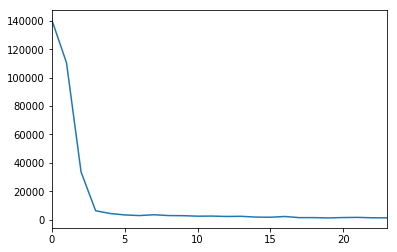

In [37]:
%matplotlib inline
d = pd.DataFrame(all_hist).applymap(lambda x: x[0])
d.loss.plot()

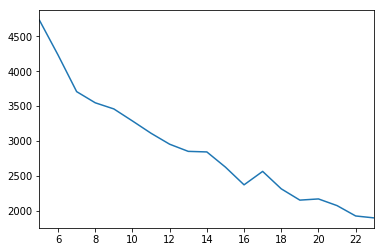

In [39]:
d.val_loss[5:].plot()